# Prep Work

* Author: [leip@](https://moma.corp.google.com/person/leip)
* Last Update: 10/02/23

In [ ]:
import sys

if 'google.colab' in sys.modules:
    ! pip install google-cloud-aiplatform
    ! pip install google-cloud-discoveryengine
    ! pip install langchain==0.0.236
    from google.colab import auth as google_auth
    google_auth.authenticate_user()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.0/832.0 kB 6.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.0 MB/s eta 0:00:00


In [ ]:
import vertexai
from vertexai.language_models import CodeGenerationModel

VERTEX_API_PROJECT = 'certain-haiku-391918'
VERTEX_API_LOCATION = 'us-central1'

vertexai.init(project=VERTEX_API_PROJECT, location=VERTEX_API_LOCATION)
code_generation_model = CodeGenerationModel.from_pretrained("code-bison")

In [ ]:
def code_generation(prefix):
  parameters = {
    "temperature": 0.2,
    "max_output_tokens": 2048
  }

  response = code_generation_model.predict(
        prefix=prefix, **parameters
  )
  return response.text

# Example 1 - Codey for DevOps - Deploy Apps to GKE
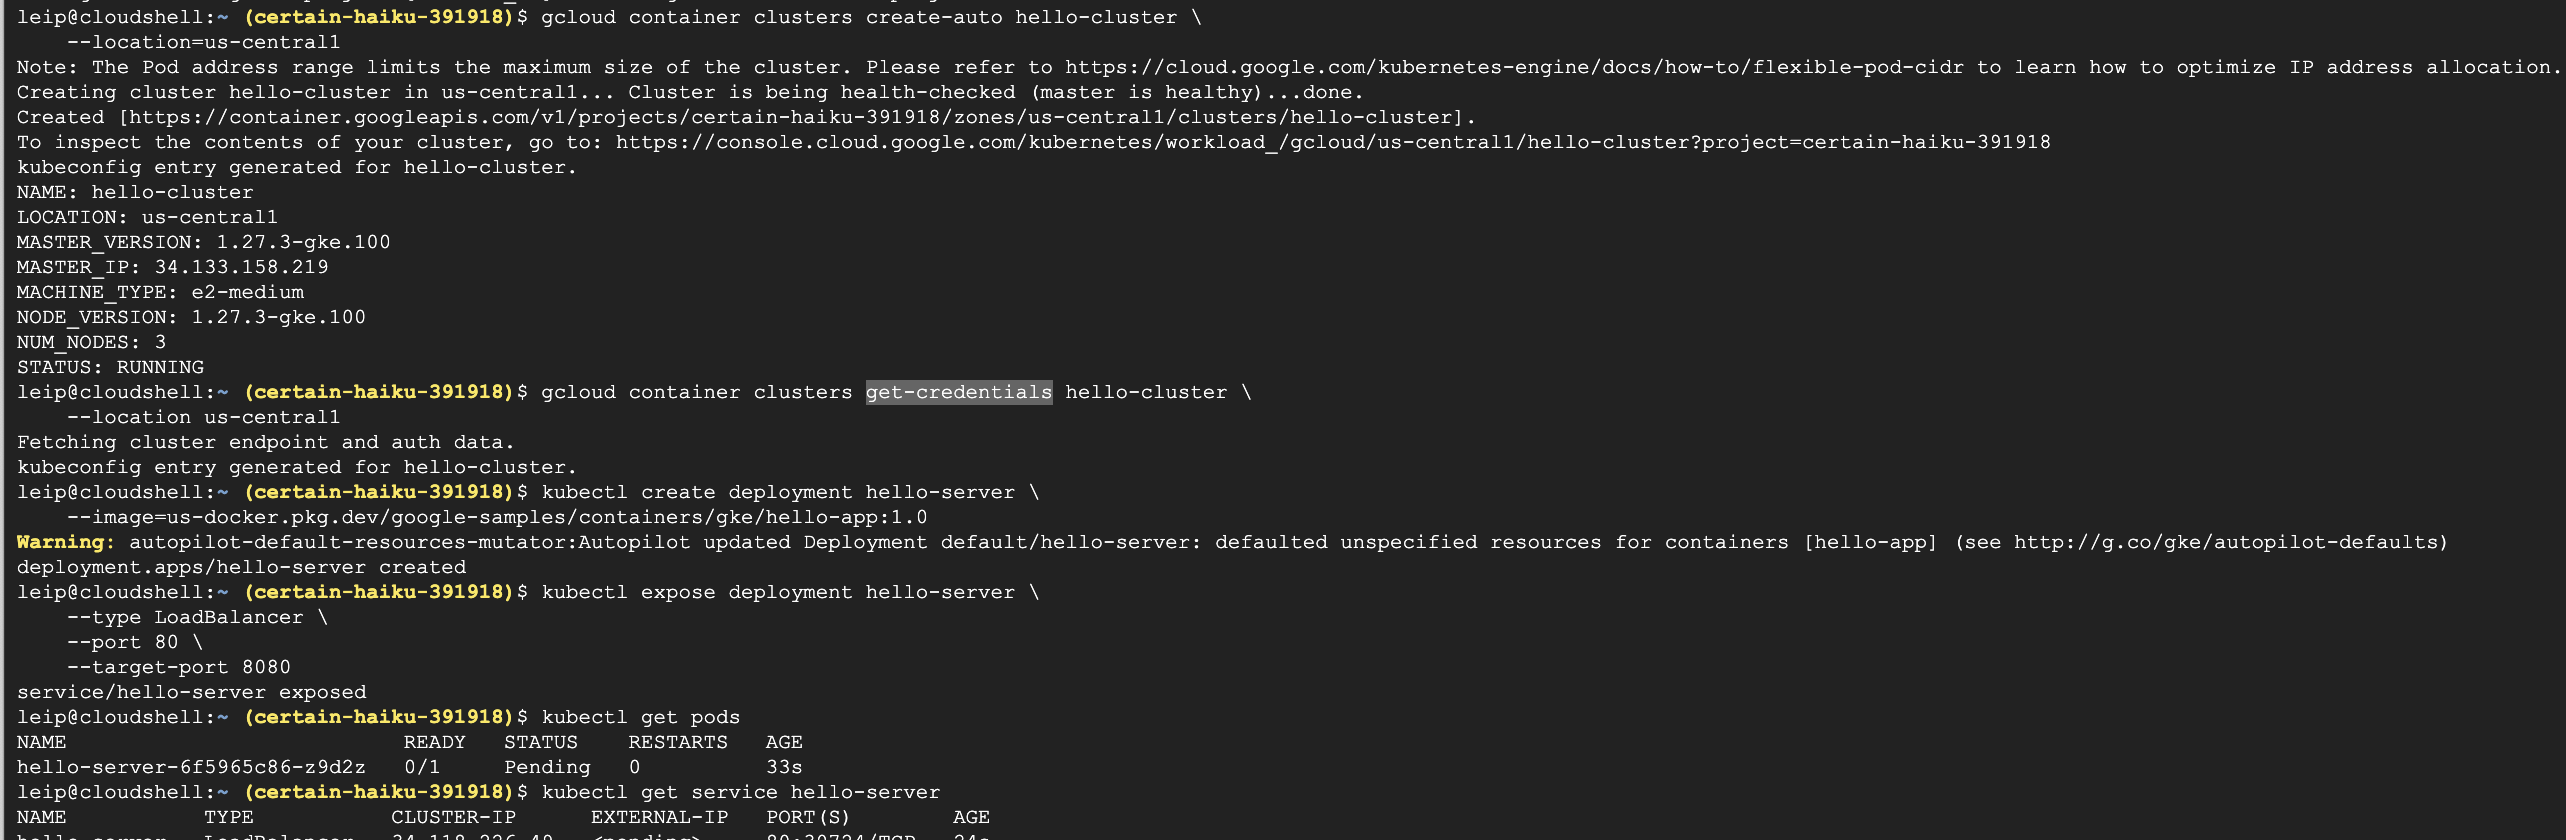

## Generate Overall Step by Step Guide to Deploy an App to GKE

In [ ]:
prompt_1 = "You are an expert in google cloud platform. Please tell me all the steps needed to deploy an app to a GKE cluster"

In [ ]:
print(code_generation(prompt_1))

 1. **Create a GKE cluster.**

You can create a GKE cluster using the [Google Cloud Platform Console](https://console.cloud.google.com/) or the [gcloud command-line tool](https://cloud.google.com/sdk/gcloud/).

2. **Configure your cluster.**

Once you have created a cluster, you need to configure it. This includes setting up networking, storage, and security.

3. **Deploy your app.**

You can deploy your app to your cluster using a variety of methods, including:

* [kubectl](https://kubernetes.io/docs/reference/kubectl/overview/)
* [Helm](https://helm.sh/)
* [Skaffold](https://skaffold.dev/)

4. **Test your app.**

Once you have deployed your app, you need to test it to make sure it is working properly.

5. **Monitor your app.**

Once your app is up and running, you need to monitor it to make sure it is performing as expected.

6. **Update your app.**

As your app changes, you will need to update it. You can do this using the same methods that you used to deploy your app.

7. **Delete 

## Generate Deployment Code for Every Single Step Listed Above

### Step 1: Create GKE Cluster

In [ ]:
prompt_2 = "You are an expert in google cloud platform. Generate gcloud CLI to create a GKE cluster with cluster name [hello-cluster]"

In [ ]:
print(code_generation(prompt_2))

```
gcloud container clusters create hello-cluster \
  --num-nodes 3 \
  --machine-type n1-standard-1 \
  --enable-autoscaling \
  --min-nodes 1 \
  --max-nodes 10 \
  --enable-autorepair \
  --enable-autoprovisioning \
  --location us-central1-a

# Reference: https://cloud.google.com/kubernetes-engine/docs/concepts/autopilot-clusters
```


### Step 2: Deploy Docker Image to the Cluster

In [ ]:
prompt_3 = "You are an expert in google cloud platform. Generate gcloud CLI to Get authentication credentials for the cluster [hello-cluster]"

In [ ]:
print(code_generation(prompt_3))

```
gcloud container clusters get-credentials hello-cluster
```


In [ ]:
prompt_4 = "You are an expert in google cloud platform. Generate kubectl CLI to Create the Deployment with image name : [us-docker.pkg.dev/google-samples/containers/gke/hello-app:1.0]"

In [ ]:
print(code_generation(prompt_4))

```
kubectl create deployment hello-app --image=us-docker.pkg.dev/google-samples/containers/gke/hello-app:1.0
```


### Step3: Expose the Deployment to the internet

In [ ]:
prompt_5 = "You are an expert in google cloud platform. Generate kubectl CLI to Expose the Deployment of hello-app"

In [ ]:
print(code_generation(prompt_5))

```
kubectl expose deployment hello-app --type=LoadBalancer --port=8080
```


### Step 4: Check Service Running

In [ ]:
prompt_6 = "You are an expert in google cloud platform. Generate kubectl CLI to Inspect the running Pods"

In [ ]:
print(code_generation(prompt_6))

```
kubectl get pods
```


In [ ]:
prompt_7 = "You are an expert in google cloud platform. Generate kubectl CLI to Inspect the hello-app Service"

In [ ]:
print(code_generation(prompt_7))

```
kubectl get service hello-app
```


### Step 5: Delete Service and Cluster

In [ ]:
prompt_8 = "You are an expert in google cloud platform. Generate kubectl CLI to Delete the hello-app Service"

In [ ]:
print(code_generation(prompt_8))

```
kubectl delete service hello-app
```


In [ ]:
prompt_9 = "You are an expert in google cloud platform. Generate gcloud CLI to Delete the hello-cluster Cluster"

In [ ]:
print(code_generation(prompt_9))

```
gcloud container clusters delete hello-cluster --zone us-central1-a
```


## Example 2 - OOP Design

In [ ]:
oop_prompt = """You are great at designing Object Oriented Programming solutions.
Design a parking lot using object-oriented principles in Java.
Here are the requirements:
[
1) The parking lot has multiple levels. Each level has multiple rows of spots.
2) The parking lot can park motorcycles, cars, and buses.
3) The parking lot has motorcycle spots, compact spots, and large spots.
4) A motorcycle can park in any spot.
5) A car can park in either a single compact spot or a single large spot.
6) A bus can park in five large spots that are consecutive and within the same row. It cannot park in small spots. In the below implementation, we have created an abstract class Vehicle, from which Car, Bus, and Motorcycle inherit. To handle the different parking spot sizes, we have just one class ParkingSpot which has a member variable indicating the size.
]"""

In [ ]:
print(code_generation(oop_prompt))

```java
// Vehicle.java
// Abstract class Vehicle

abstract class Vehicle {
    private String licensePlate;
    private int spotsNeeded;
    private VehicleSize size;

    public Vehicle(String licensePlate, int spotsNeeded, VehicleSize size) {
        this.licensePlate = licensePlate;
        this.spotsNeeded = spotsNeeded;
        this.size = size;
    }

    public String getLicensePlate() {
        return licensePlate;
    }

    public int getSpotsNeeded() {
        return spotsNeeded;
    }

    public VehicleSize getSize() {
        return size;
    }
}

// Car.java
// Concrete class Car

class Car extends Vehicle {
    public Car(String licensePlate) {
        super(licensePlate, 1, VehicleSize.COMPACT);
    }
}

// Bus.java
// Concrete class Bus

class Bus extends Vehicle {
    public Bus(String licensePlate) {
        super(licensePlate, 5, VehicleSize.LARGE);
    }
}

// Motorcycle.java
// Concrete class Motorcycle

class Motorcycle extends Vehicle {
    public Motorcycle(S

## Example 3 - RAG to Assist Tech Lead with Coding Style Review


* ES is retriver and Codey is generator in RAG
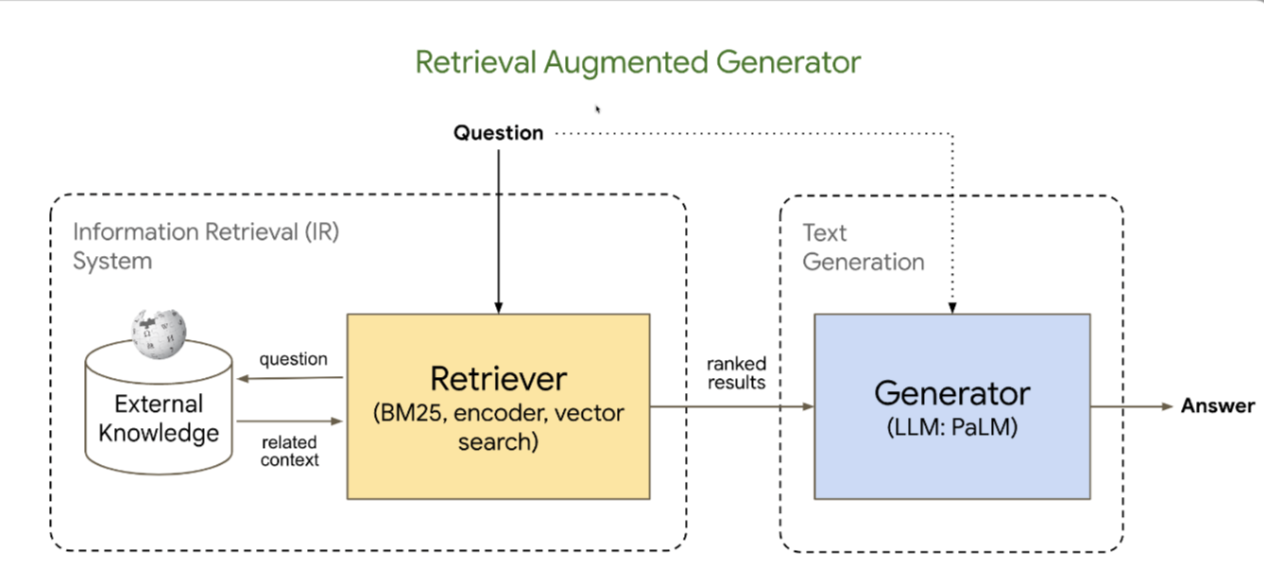

RAG takes an input and retrieves a set of relevant/supporting documents given a source (e.g., Wikipedia). The documents are concatenated as context with the original input prompt and fed to the text generator which produces the final output. This makes RAG adaptive for situations where facts could evolve over time.

RAG allows language models to bypass retraining, enabling access to the latest information for generating reliable outputs via retrieval-based generation.

In [ ]:
from google.colab import auth as google_auth
google_auth.authenticate_user()

from __future__ import annotations

from google.cloud import discoveryengine_v1beta
from google.cloud.discoveryengine_v1beta.services.search_service import pagers
from google.protobuf.json_format import MessageToDict
import json
from langchain.agents import AgentType, initialize_agent, AgentExecutor, LLMSingleActionAgent, AgentOutputParser
from langchain.callbacks.manager import CallbackManagerForChainRun, Callbacks
from langchain.chains.base import Chain
from langchain.chains.question_answering import load_qa_chain
from langchain.chains import LLMChain
from langchain.llms import VertexAI
from langchain.llms.utils import enforce_stop_tokens
from langchain.prompts import StringPromptTemplate
from langchain.retrievers import GoogleCloudEnterpriseSearchRetriever as EnterpriseSearchRetriever
from langchain.schema import AgentAction, AgentFinish, Document, BaseRetriever
from langchain.tools import Tool
from langchain.utils import get_from_dict_or_env
from pydantic import BaseModel, Extra, Field, root_validator
import re
from typing import Any, Mapping, List, Dict, Optional, Tuple, Sequence, Union
import unicodedata
import vertexai
from vertexai.preview.language_models import TextGenerationModel
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA

vertexai.init(project=VERTEX_API_PROJECT, location=VERTEX_API_LOCATION)

In [ ]:
PROJECT_ID = "certain-haiku-391918"
SEARCH_ENGINE_ID = "coding-style_1696290128720"
llm = VertexAI(model_name="code-bison", max_output_tokens=1000, temperature=0.2)

In [ ]:
llm = VertexAI( temperature=0.0)

retriever=EnterpriseSearchRetriever(
    project_id=PROJECT_ID,
    search_engine_id=SEARCH_ENGINE_ID,
    max_documents=3,
)

prompt_template = """If it's a coding style question, use the context to answer the question at the end.
You should use the context and context only to answer the question.

Context: {context}

Question: {question}
Helpful Answer:
"""
retrieval_prompt = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)
retrieval_qa = RetrievalQA.from_llm(llm=llm, prompt=retrieval_prompt, retriever=retriever, return_source_documents=True)
print(retrieval_qa.combine_documents_chain.llm_chain.prompt.template)


If it's a coding style question, use the context to answer the question at the end.
You should use the context and context only to answer the question.

Context: {context}

Question: {question}
Helpful Answer:



In [ ]:
query = """You are a great at coding python according to the style guide. Please tell me how to improve the code block below and explain your fix:

def connect_to_next_port(self, minimum: int) -> int:
    #Connects to the next available port.

    #Args:
    #  minimum: A port value greater or equal to 1024.

    #Returns:
    #  The new minimum port.

    assert minimum >= 1024, 'Minimum port must be at least 1024.'
    port = self._find_next_open_port(minimum)
    assert port is not None
    return port
"""

results = retrieval_qa({"query": query})
print(results)

{'query': "You are a great at coding python according to the style guide. Please tell me how to improve the code block below and explain your fix:\n\ndef connect_to_next_port(self, minimum: int) -> int:\n    #Connects to the next available port.\n\n    #Args:\n    #  minimum: A port value greater or equal to 1024.\n\n    #Returns:\n    #  The new minimum port.\n\n    assert minimum >= 1024, 'Minimum port must be at least 1024.'\n    port = self._find_next_open_port(minimum)\n    assert port is not None\n    return port\n", 'result': ' The code is well written and follows the style guide. One thing that could be improved is the use of a type annotation for the return value of the _find_next_open_port method. This would make the code more explicit and easier to read.\n\nHere is the improved code:\n\n```python\ndef connect_to_next_port(self, minimum: int) -> int:\n    #Connects to the next available port.\n\n    #Args:\n    #  minimum: A port value greater or equal to 1024.\n\n    #Return

In [ ]:
print("Query Result:")
for line in results['result'].split("\n"):
  print(line)

Query Result:
 The code is well written and follows the style guide. One thing that could be improved is the use of a type annotation for the return value of the _find_next_open_port method. This would make the code more explicit and easier to read.

Here is the improved code:

```python
def connect_to_next_port(self, minimum: int) -> int:
    #Connects to the next available port.

    #Args:
    #  minimum: A port value greater or equal to 1024.

    #Returns:
    #  The new minimum


In [ ]:
print("Source Citation:")
for docline in str(results['source_documents'][0]).split("=")[1].split("\\n"):
  print(docline)

Source Citation:
'When handling integers, implicit false may involve more risk than benefit (i.e., accidentally handling None as 0). You may
compare a value which is known to be an integer (and is not the result of len()) against the integer 0.

Note that \'0\' (i.e., 0 as string) evaluates to true.
Note that Numpy arrays may raise an exception in an implicit boolean context. Prefer the .size attribute when testing
emptiness of a np.array (e.g. if not users.size).

2.16 Lexical Scoping

Okay to use.

2.16.1 Definition
A nested Python function can refer to variables defined in enclosing functions, but cannot assign to them. Variable bindings are
resolved using lexical scoping, that is, based on the static program text. Any assignment to a name in a block will cause Python to
treat all references to that name as a local variable, even if the use precedes the assignment. If a global declaration occurs, the
name is treated as a global variable.
An example of the use of this feature is:

2.